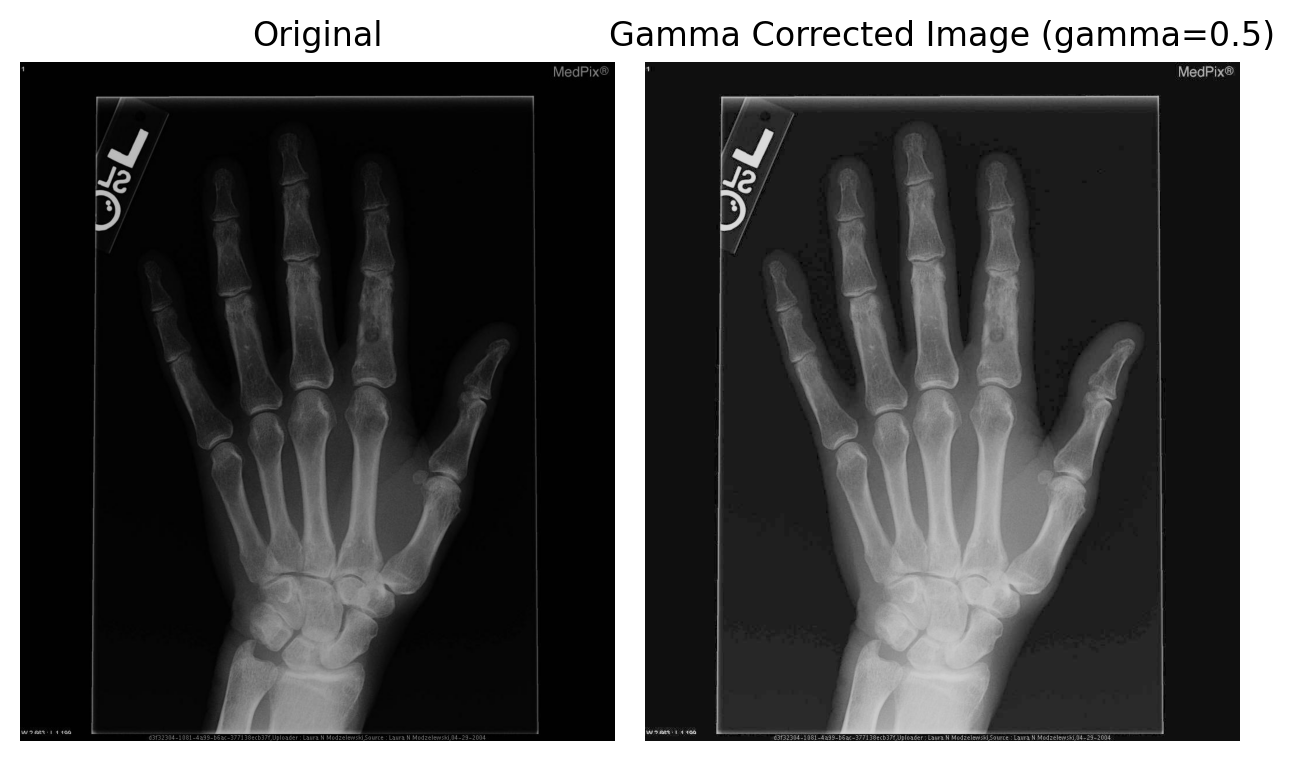

In [2]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. Download the image
# The provided URL is a case page, not a direct image URL.
# I will use a publicly available medical image URL for demonstration.
# Example: A chest X-ray from a public dataset
image_url = "https://d2rfm59k9u0hrr.cloudfront.net/medpix/img/full/synpic19850.jpg"

response = requests.get(image_url, stream=True)
response.raise_for_status()

# Save the image to a file
image_path = "medical_image.jpg"
with open(image_path, 'wb') as out_file:
    out_file.write(response.content)

# Open the image using Pillow
orig_img = Image.open(image_path)

# Convert the image to a numpy array
orig_img = np.array(orig_img)

# Apply gamma correction
gamma = 0.5  # You can adjust this value
gamma_corrected_img = np.power(orig_img / 255.0, gamma) * 255.0
gamma_corrected_img = gamma_corrected_img.astype(np.uint8)

# Display the original and gamma-corrected images
fig, axes = plt.subplots(1, 2, dpi=200) # 1 row, 2 columns

# Display the original image
axes[0].imshow(orig_img, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

# Display the gamma-corrected image
axes[1].imshow(gamma_corrected_img, cmap='gray')
axes[1].set_title(f"Gamma Corrected Image (gamma={gamma})")
axes[1].axis('off')

plt.tight_layout()
plt.savefig("gamma_correction.png")
plt.show()